In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds  # 행렬분해
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings("ignore")

In [47]:
df=pd.read_csv("groceries - groceries.csv")
df=df.iloc[:,1:]


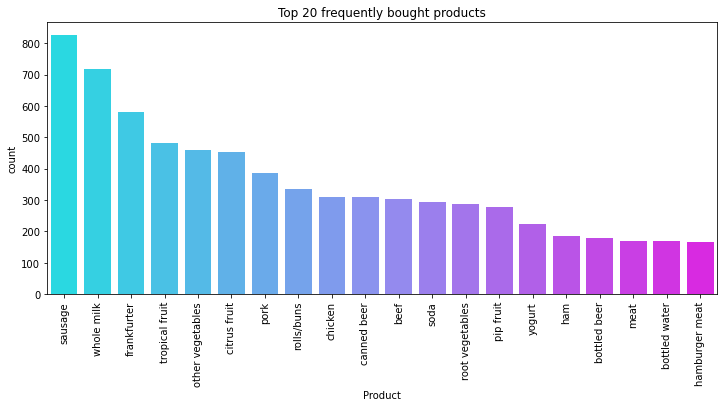

In [54]:
# 고객들이 자주 구매하는 상위 20개 품목 알아보기
plt.rcParams['figure.figsize']=12,5
sns.countplot(data=df, x=df['Item 1'],
             order = df['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()
# 소세지, 우유를 가장 많이 구매하였다

In [49]:
# Apriori
df_list=df.values.tolist()
transactions=[]
# 이중리스트에 상품이 들어감
for i in range(len(df_list)):
    transactions.append([x for x in df_list[i] if str(x) != 'nan'])

In [5]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [6]:
rules = apriori(transactions, min_support=0.0003, min_confidence=0.1, min_lift=3)

In [7]:
rules

<generator object apriori at 0x000001F79D70E040>

In [13]:
association_rules = apriori(transactions,
                            min_support = 0.003,
                            min_confidence = 0.1, 
                            min_lift = 3,    
                            min_length = 2)
association_results = list(association_rules)

In [14]:
association_results

[RelationRecord(items=frozenset({'Instant food products', 'hamburger meat'}), support=0.003050330452465684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.379746835443038, lift=11.42143769597027)]),
 RelationRecord(items=frozenset({'sugar', 'baking powder'}), support=0.003253685815963396, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'sugar'}), confidence=0.18390804597701146, lift=5.431638535086811)]),
 RelationRecord(items=frozenset({'whipped/sour cream', 'baking powder'}), support=0.004575495678698526, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.25862068965517243, lift=3.607850330154072)]),
 RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.017386883579054397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), i

In [63]:
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    print(f"\nRule : {items[0]} => {items[1]} ")
    print(f"The Support: {str(item[1])}")
    conf = round(item[2][0][2] * 100,2)
    print(f"The Confidence: {conf}") 
    print(f"The Lift: {str(item[2][0][3])}")
    print(f"{items[0]} 상품을 구매하는 사람중에서 {items[1]}도 같이 구매하는 사람의 비율 : {str(conf)}%")
    print("="*100)
    
# Rule : Instant food products => hamburger meat 
# The Support: 0.003050330452465684
# The Confidence: 37.97
# The Lift: 11.42143769597027
# Instant food products 상품을 구매하는 사람중에서 hamburger meat도 같이 구매하는 사람의 비율 : 37.97%
# ====================================================================================================


Rule : Instant food products => hamburger meat 
The Support: 0.003050330452465684
The Confidence: 37.97
The Lift: 11.42143769597027
Instant food products 상품을 구매하는 사람중에서 hamburger meat도 같이 구매하는 사람의 비율 : 37.97%

Rule : sugar => baking powder 
The Support: 0.003253685815963396
The Confidence: 18.39
The Lift: 5.431638535086811
sugar 상품을 구매하는 사람중에서 baking powder도 같이 구매하는 사람의 비율 : 18.39%

Rule : whipped/sour cream => baking powder 
The Support: 0.004575495678698526
The Confidence: 25.86
The Lift: 3.607850330154072
whipped/sour cream 상품을 구매하는 사람중에서 baking powder도 같이 구매하는 사람의 비율 : 25.86%

Rule : root vegetables => beef 
The Support: 0.017386883579054397
The Confidence: 33.14
The Lift: 3.0403668431100312
root vegetables 상품을 구매하는 사람중에서 beef도 같이 구매하는 사람의 비율 : 33.14%

Rule : whipped/sour cream => berries 
The Support: 0.009049313675648195
The Confidence: 27.22
The Lift: 3.796885505454703
whipped/sour cream 상품을 구매하는 사람중에서 berries도 같이 구매하는 사람의 비율 : 27.22%

Rule : bottled beer => liquor 
The Support

In [34]:
te=TransactionEncoder()
te_result=te.fit_transform(transactions)
df=pd.DataFrame(te_result, columns=te.columns_, dtype='int')

In [35]:
te_result
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [41]:
apr_result=apriori(df, min_support=0.01, use_colnames=True)

In [42]:
apr_result=association_rules(apr_result, metric='confidence', min_threshold=0.2)

In [43]:
apr_result.sort_values(by=['confidence'], ascending=False).head(5)  
# confidence의 최대값은 0.586207로 1을 넘지 않는다
# antecedents를 구매한 사람이 consequents 상품을 전부 구매하지는 않았다는 의미이다


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
157,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
185,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
164,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
154,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
222,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553


In [44]:
apr_result.sort_values(by=['lift'], ascending=False).head(5)  # lift가 높은 상위 5개
# confidence의 값이 높은 편은 아니다

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
209,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
186,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
2,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
157,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059


In [58]:
apr_result[apr_result['antecedents']=={'beef'}].sort_values(by=['lift'], ascending=False)  # lift가 높은 순으로 정렬
# beef와 함께 판매하면 좋을 상품은 root vegetables와 other vegetables, yogurt, whole milk, rolls/buns등이 있다.
# 특히 oot vegetables와 함께 진열하는 것이 구매율을 높일 것으로 보인다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
4,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275
3,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
1,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329


In [59]:
apr_result[apr_result['antecedents']=={'chicken'}].sort_values(by=['lift'], ascending=False) 
# chicken과 함께 진열시킬 상품으로는 root vegetables, other vegetables, whole milk가 있다.
# chicken과 가장 높은 lift값을 가지는 상품은 root vegetables이다.
# chicken을 구매한 사람중 root vegatbles를 구매한 사람이 전체 상품거래중에서 root vegatbles를 구매한 사람보다 2배가 많다는 의미이다

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(chicken),(root vegetables),0.042908,0.108998,0.010880,0.253555,2.326221,0.006203,1.193659
26,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521
28,(chicken),(whole milk),0.042908,0.255516,0.017590,0.409953,1.604411,0.006627,1.261736
